# Customizing Ticks
Matplotlib’s default tick locators and formatters are designed to be generally sufficient
in many common situations, but are in no way optimal for every plot.

## Major and Minor Ticks
Within each axis, there is the concept of a major tick mark and a minor tick mark. As
the names would imply, major ticks are usually bigger or more pronounced, while
minor ticks are usually smaller. By default, Matplotlib rarely makes use of minor
ticks, but one place you can see them is within logarithmic plots

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

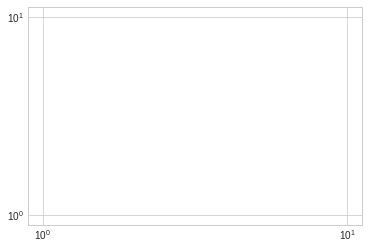

In [2]:
ax = plt.axes(xscale='log', yscale='log')

In [3]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [4]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

## Hiding Ticks or Labels
Perhaps the most common tick/label formatting operation is the act of hiding ticks or
labels. We can do this using plt.NullLocator() and plt.NullFormatter(), as
shown here


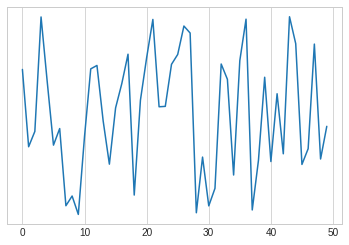

In [11]:
ax=plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_formatter(plt.NullFormatter())

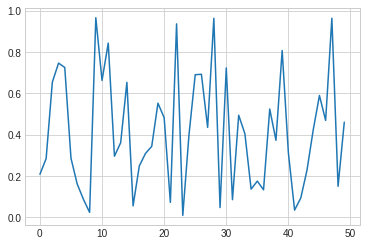

In [6]:
ax=plt.axes()
ax.plot(np.random.rand(50))

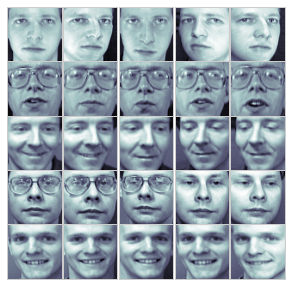

In [16]:
fig, ax = plt.subplots(5,5,figsize=(5,5))
fig.subplots_adjust(hspace=0,wspace=0)

#Get some face images from scikit-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i,j].xaxis.set_major_locator(plt.NullLocator())
        ax[i,j].yaxis.set_major_locator(plt.NullLocator())
        ax[i,j].imshow(faces[10*i+j], cmap='bone')

## Reducing or Increasing the Number of Ticks
One common problem with the default settings is that smaller subplots can end up
with crowded labels.

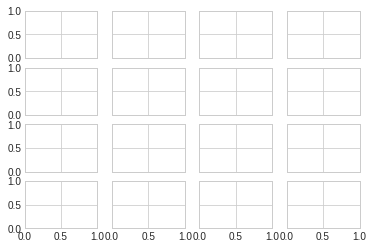

In [17]:
fig, ac =plt.subplots(4,4,sharex=True, sharey=True)

Particularly for the x ticks, the numbers nearly overlap, making them quite difficult to
decipher. We can fix this with the plt.MaxNLocator(), which allows us to specify the
maximum number of ticks that will be displayed. Given this maximum number, Mat‐
plotlib will use internal logic to choose the particular tick locations

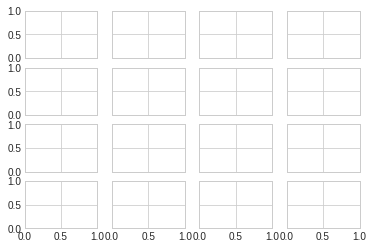

In [18]:
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
    
fig

## Fancy Tick Formats
Matplotlib’s default tick formatting can leave a lot to be desired; it works well as a
broad default, but sometimes you’d like to do something more

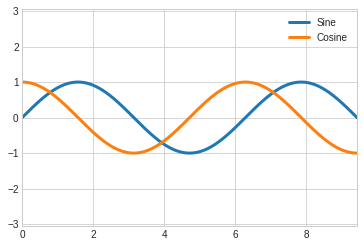

In [19]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

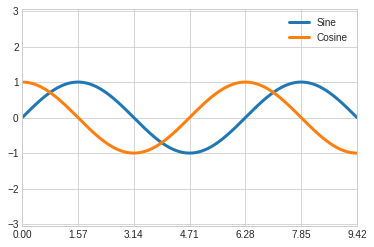

In [20]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

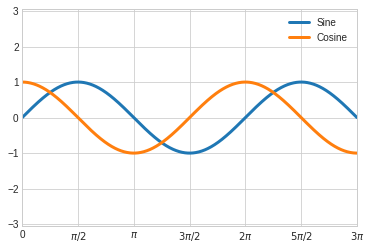

In [23]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

    
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

**This is much better! Notice that we’ve made use of Matplotlib’s LaTeX support, speci‐
fied by enclosing the string within dollar signs. This is very convenient for display of
mathematical symbols and formulae; in this case, "$\pi$" is rendered as the Greek
character π.
The plt.FuncFormatter() offers extremely fine-grained control over the appearance
of your plot ticks, and comes in very handy when you’re preparing plots for presenta‐
tion or publication.**